# Wine Dataset

## Imports

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Prepare Dataset

In [8]:
data = load_wine()
X = data.data
y = data.target

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

## Default Hyperparameters

Logistic Regression score: 0.9814814814814815


c:\Users\Komputer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


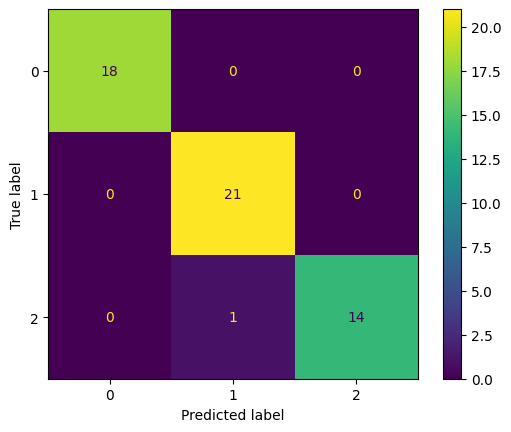

In [21]:
### Logistic Regression

logisticReg = LogisticRegression()
logisticReg.fit(X_train,y_train)
preds = logisticReg.predict(X_test)
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()
print("Logistic Regression score:", logisticReg.score(X_test,y_test))

KNN score: 0.7222222222222222


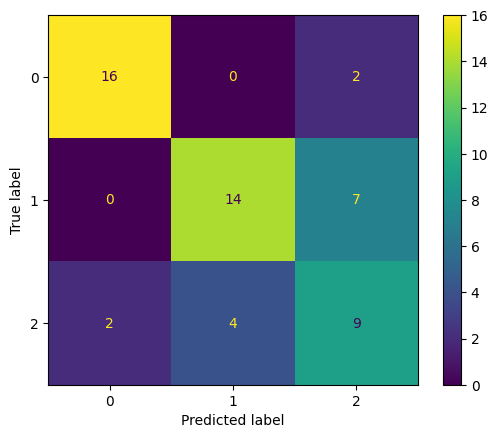

In [22]:
### K-Nearest Neighbors

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
preds = knn.predict(X_test)

cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()

print("KNN score:", knn.score(X_test,y_test))

LDA score: 0.9814814814814815


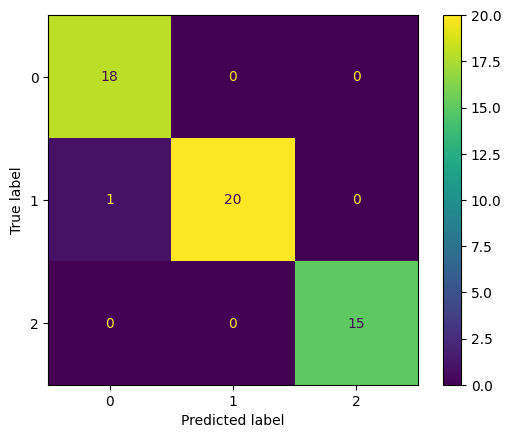

In [ ]:
### Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
preds = lda.predict(X_test)

cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()

print("LDA score:", lda.score(X_test,y_test))

## Optymalizacja

In [32]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [33]:
def objective_lr(trial):
    C = trial.suggest_float("C",1e-3,1e2,log=True)
    solver = trial.suggest_categorical("solver",["liblinear","lbfgs","saga"])
    max_iter = trial.suggest_int("max_iter",100,1000)
    clf = LogisticRegression(C=C,solver=solver,max_iter=max_iter)
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(clf,X_train,y_train,cv=cv,scoring="accuracy").mean()
    return score

In [34]:
model = optuna.create_study(direction="maximize")
model.optimize(objective_lr,n_trials=50)
print("Best hyperparameters:", model.best_params)

[I 2025-11-01 17:18:45,969] A new study created in memory with name: no-name-80601731-6ee2-4c34-a0e9-664702330387
c:\Users\Komputer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Komputer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/p

Best hyperparameters: {'C': 52.26144996344169, 'solver': 'lbfgs', 'max_iter': 455}


Optimized Logistic Regression score: 0.9444444444444444


c:\Users\Komputer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


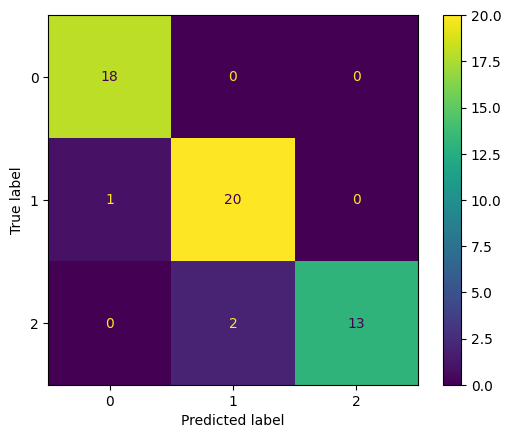

In [35]:
lr = LogisticRegression(**model.best_params)
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()
print("Optimized Logistic Regression score:", lr.score(X_test,y_test))

In [36]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int("n_neighbors",1,10)
    weights = trial.suggest_categorical("weights",["uniform","distance"])
    metric = trial.suggest_categorical("metric",["euclidean","manhattan","minkowski"])
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights,metric=metric)
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(knn,X_train,y_train,cv=cv,scoring="accuracy").mean()
    return score

[I 2025-11-01 17:26:48,136] A new study created in memory with name: no-name-c6e64a25-97ce-4ad4-ae3e-15b06522dab1
[I 2025-11-01 17:26:48,144] Trial 0 finished with value: 0.7903333333333333 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.7903333333333333.
[I 2025-11-01 17:26:48,158] Trial 1 finished with value: 0.7263333333333334 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.7903333333333333.
[I 2025-11-01 17:26:48,172] Trial 2 finished with value: 0.726 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.7903333333333333.
[I 2025-11-01 17:26:48,179] Trial 3 finished with value: 0.75 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 0 with value: 0.7903333333333333.
[I 2025-11-01 17:26:48,186] Trial 4 finished with value: 0.7983333333333333 and parameters:

Optimized KNN score: 0.7592592592592593


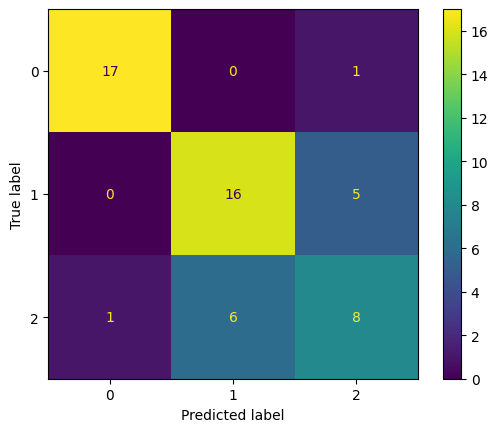

In [44]:
model = optuna.create_study(direction="maximize")
model.optimize(objective_knn,n_trials=50)

knn = KNeighborsClassifier(**model.best_params)
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()
print("Optimized KNN score:", knn.score(X_test,y_test))

In [45]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [56]:
def objective_lda(trial):
    solver = trial.suggest_categorical("solver",["svd","lsqr","eigen"])
    if solver in ["lsqr","eigen"]:
        shrinkage = trial.suggest_float("shrinkage",0.0,1.0)
        lda = LinearDiscriminantAnalysis(solver=solver,shrinkage=shrinkage)
    else:
        lda = LinearDiscriminantAnalysis(solver=solver)
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(lda,X_train,y_train,cv=cv,scoring="accuracy").mean()
    return score

[I 2025-11-01 17:34:12,143] A new study created in memory with name: no-name-a9f544e6-305f-44b1-a369-254410afd775
[I 2025-11-01 17:34:12,154] Trial 0 finished with value: 0.7026666666666668 and parameters: {'solver': 'lsqr', 'shrinkage': 0.7320975063399682}. Best is trial 0 with value: 0.7026666666666668.
[I 2025-11-01 17:34:12,166] Trial 1 finished with value: 0.7106666666666668 and parameters: {'solver': 'eigen', 'shrinkage': 0.9258800241749436}. Best is trial 1 with value: 0.7106666666666668.
[I 2025-11-01 17:34:12,176] Trial 2 finished with value: 0.7106666666666668 and parameters: {'solver': 'lsqr', 'shrinkage': 0.788242842699471}. Best is trial 1 with value: 0.7106666666666668.
[I 2025-11-01 17:34:12,184] Trial 3 finished with value: 0.992 and parameters: {'solver': 'svd'}. Best is trial 3 with value: 0.992.
[I 2025-11-01 17:34:12,193] Trial 4 finished with value: 0.6863333333333334 and parameters: {'solver': 'eigen', 'shrinkage': 0.26522573306368646}. Best is trial 3 with value:

Optimized LDA score: 0.9814814814814815


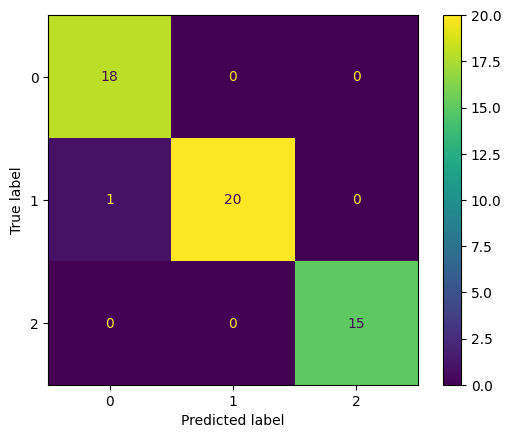

In [57]:
model = optuna.create_study(direction="maximize")
model.optimize(objective_lda,n_trials=50)

lda = LinearDiscriminantAnalysis(**model.best_params)
lda.fit(X_train,y_train)
preds = lda.predict(X_test)
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(cm).plot()
print("Optimized LDA score:", lda.score(X_test,y_test))